#### 激活函数
- 旧模型  
    输入层 -> 隐藏层 -> 输出层  
    输入/隐藏层 激活函数: $$ tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$
    输出函数: $$ softmax(x) =  \frac{e^{x_i}}{\sum{e^{x_j}}}$$

#### 反向传播
- 旧模型  
    $ w $:          模型权重  
    $ b $:          模型偏执  
    $ y_{pred} $:   预测结果  
    $ y_{lab} $:    实际结果  
    $ i $:          样本角标   
    $ n $:          样本总数(60,000)  
    $ Loss $:       损失函数  
    $$ Loss = \sum_{i=0}^{n}{(y_{lab}^{i}-y_{pred}^{i})^{2}}$$  
    损失函数意义：计算模型对每个样本的预测结果与实际结果之差的平方，再对样本整体进行求和。反映了模型对整个样本集的预测偏差程度。
    
    反向传播目的：计算合适的w和b，使得损失函数尽可能维持在极小值附近。  
    记
    $$ \mathrm{d} w = \frac{\mathrm{d} Loss}{\mathrm{d} w}  $$
    $$ \mathrm{d} b = \frac{\mathrm{d} Loss}{\mathrm{d} b}  $$
    在神经网络模型中，权重的更新方式为如下：
    为方便解释，这里假设w为一维。  
    如果dw>0，证明此时w位于Loss函数的极小值点右侧，需要将w向左侧移动，即减小，权重更新方式为 w = w - learning_rate * dw；  
    如果dw<0，证明此时w位于Loss函数的极小值点左侧，需要将w向右侧移动，即增加，权重更新方式为 w = w + learning_rate * dw。  
    参数b更新方式同理。其中 learning_rate 为模型的学习率，作为调整单次更新的步长。  
    参考这一更新方式与电导拟合公式，  
    通过模型计算dw正/负，确定电导减小/增加方向，减小时参照 dGd，增加时参照 dGp  
    $$ \mathrm{d}G_{p}  = \alpha_{p} e^{\beta_{p}\frac{G_{p}-G_{min}}{G_{max}-G_{min}}}  $$
    $$ \mathrm{d}G_{d}  = \alpha_{d} e^{\beta_{d}\frac{G_{max}-G_{d}}{G_{max}-G_{min}}}  $$

#### 非线性度拟合

GP段拟合参数：  
$\alpha = 0.01$ $\beta = 0.24$
![](GP50.png)

GD段拟合参数：  
$\alpha = 0.01$ $\beta = 0.20$
![](GD50.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
accu6_ideal = np.loadtxt('./acc&w/accu6_ideal.txt')
accu6_0 = np.loadtxt('./acc&w/accu6_0.txt')
accu6_wx = np.loadtxt('./acc&w/accu6_wx.txt')

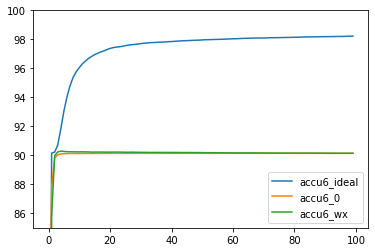

In [5]:
plt.plot(accu6_ideal, label="accu6_ideal")
plt.plot(accu6_0, label="accu6_0")
plt.plot(accu6_wx, label="accu6_wx")
plt.ylim(85, 100)
plt.legend()
plt.show()